# Baseball Case Study

## Project Description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


### -- Output: Number of predicted wins (W)
To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics


In [1]:
import warnings
warnings.simplefilter("ignore")
import missingno as ms   #for missing values visualization
import joblib

import pandas as pd
import numpy as np
import seaborn as sns    #for creating heatmap, time series plot, violin plots &so on
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.rename(columns={'W' : 'Wins', 'R' : 'Runs Scored', 'AB' : 'At Bat', 'H' : 'Hits', '2B' : 'Doubles', '3B' : 'Triples','HR' : 'Home Runs', 'BB' : 'Base on Balls', 'SO' : 'Strike Outs', 'SB' : 'Stolen Base','RA' : 'Runs Average', 'ER' : 'Earned Runs', 'ERA' : 'Earned Run Average',  'CG' : 'Complete Game', 'SHO' : 'Shut Outs',  'SV' : 'Saves',  'E' : 'Errors'}, inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

In [5]:
df.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base',
       'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game',
       'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

## Data Preprocessing

### Get general information about the dataset


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

From above we can see that there are 17 columns and 30
rows from which 'W' is our target variable as it contains discrete type of data we can say that this is a problem of linear regression

## missing/null  values

In [7]:
#To check null values present or not
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

there is no missing values present in the data

<AxesSubplot:>

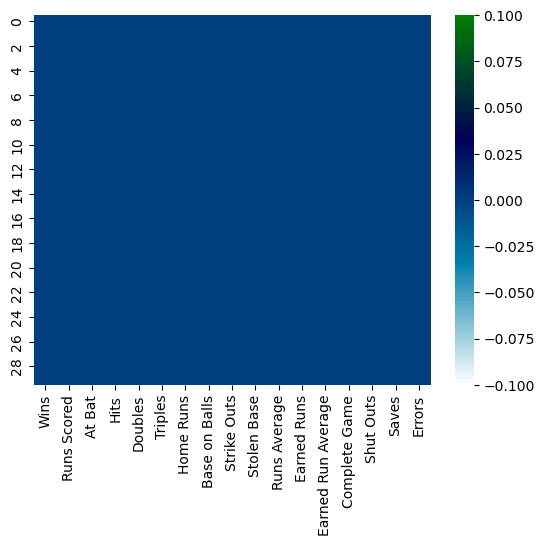

In [8]:
#cvisually showing missing values
sns.heatmap(df.isnull(), cmap='ocean_r')

found visually there is no null values

<AxesSubplot:>

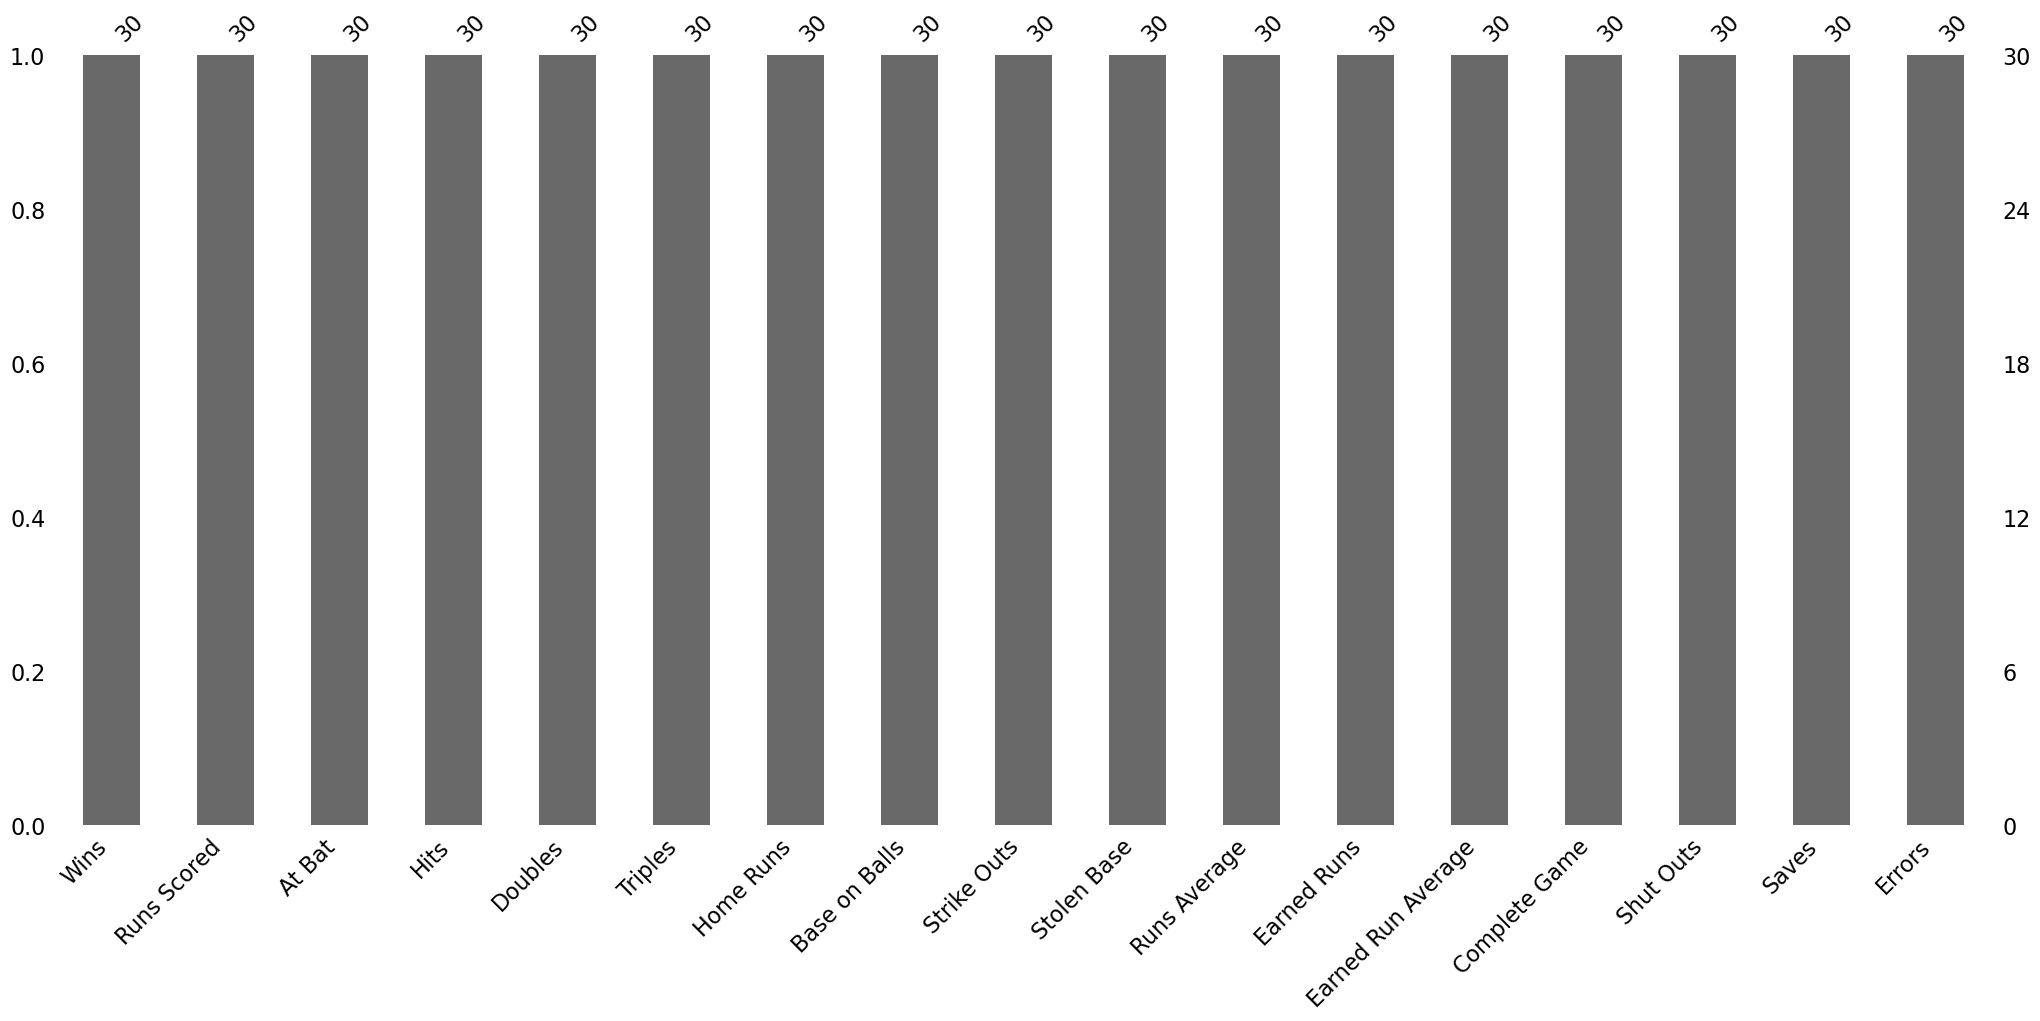

In [9]:
#How the data is accumulated in each column
ms.bar(df)

1.0 meant 100% data is filled in the column. ie, all the data has filled 100% so there is no missing value

<AxesSubplot:>

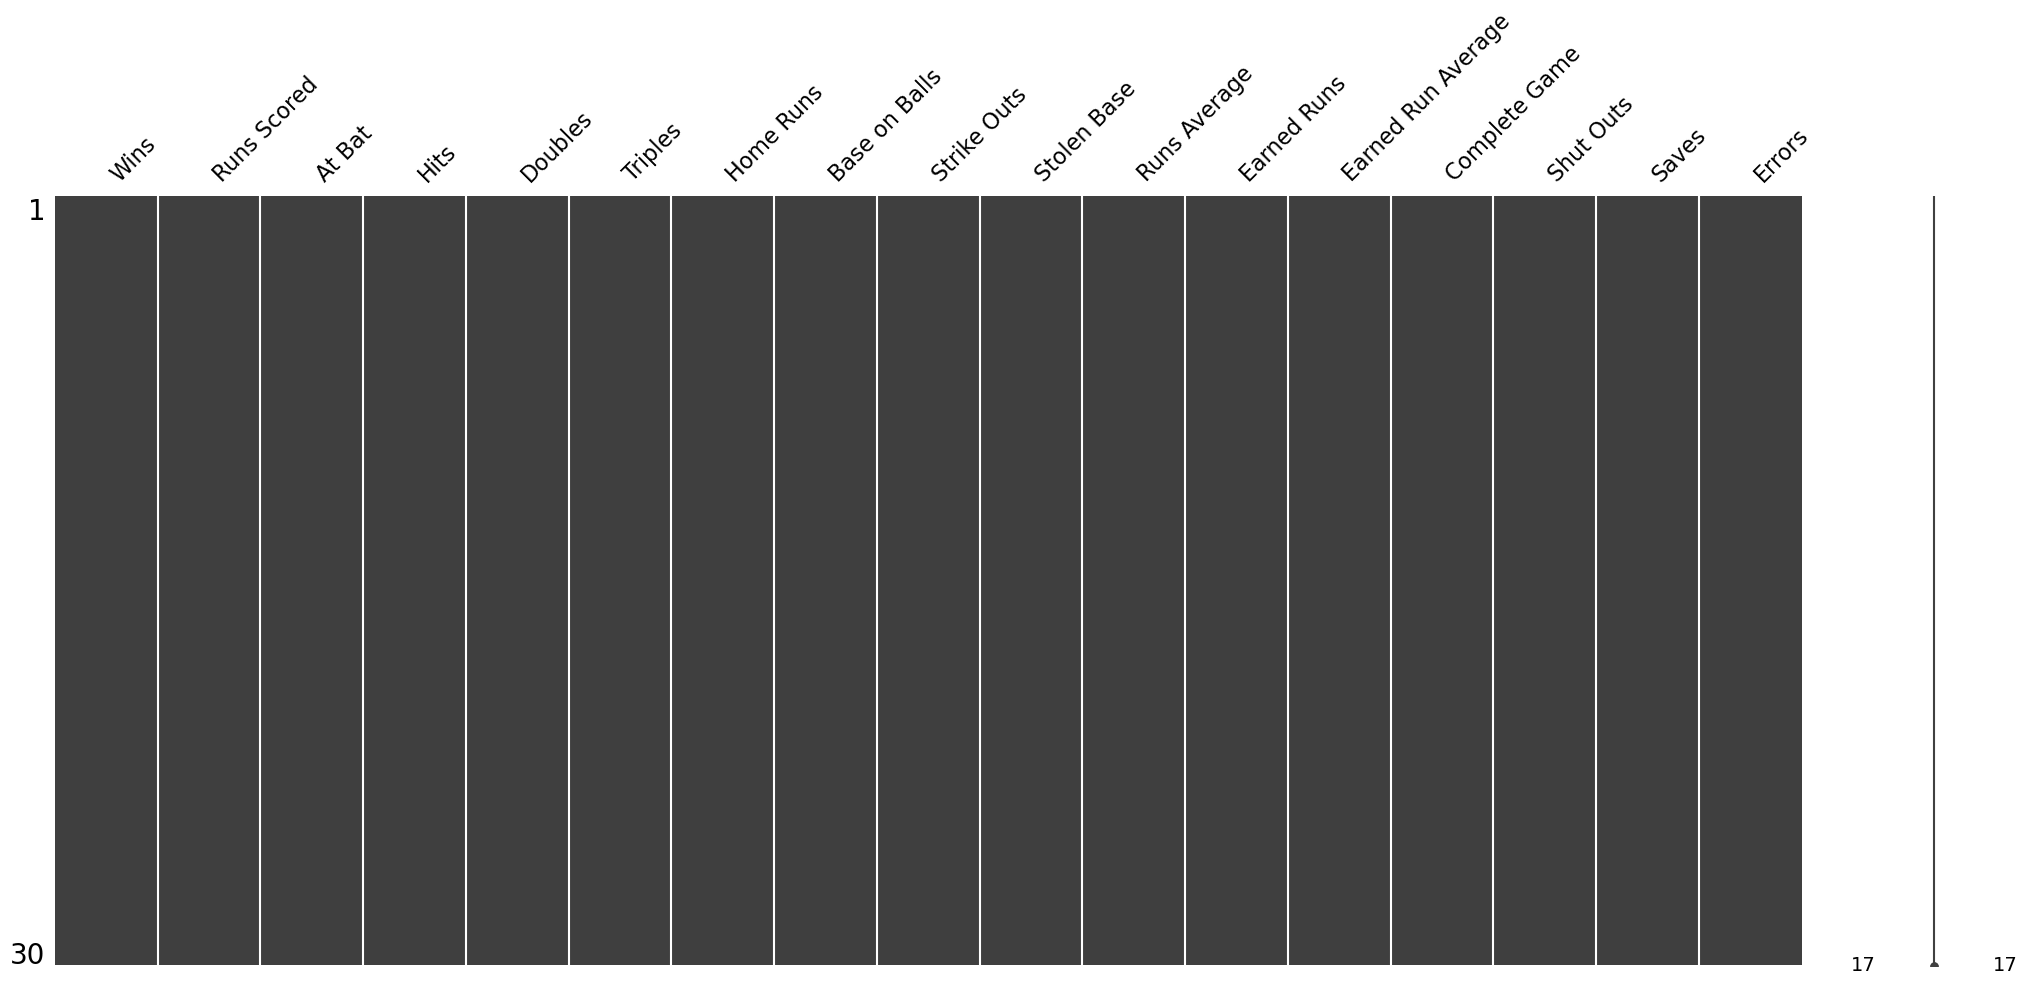

In [10]:
#matrix chart
ms.matrix(df)

there is no missing values create
spaces in the dataset.

### DUPLICATE VALUES

In [11]:
#checking duplicated values

df.duplicated().sum()

0

### UNIQUE VALUES

In [12]:
#to find unique values present in the dataset
df.nunique()

Wins                  24
Runs Scored           28
At Bat                29
Hits                  29
Doubles               22
Triples               23
Home Runs             27
Base on Balls         29
Strike Outs           29
Stolen Base           27
Runs Average          30
Earned Runs           30
Earned Run Average    30
Complete Game          9
Shut Outs             12
Saves                 20
Errors                21
dtype: int64

In [13]:
df['Wins'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [14]:
df['Wins'].value_counts(sort = False)

95     1
83     2
81     2
76     2
74     2
93     1
87     1
80     1
78     1
88     1
86     1
85     1
68     3
100    1
98     1
97     1
64     1
90     1
71     1
67     1
63     1
92     1
84     1
79     1
Name: Wins, dtype: int64

In [15]:
df.dtypes

Wins                    int64
Runs Scored             int64
At Bat                  int64
Hits                    int64
Doubles                 int64
Triples                 int64
Home Runs               int64
Base on Balls           int64
Strike Outs             int64
Stolen Base             int64
Runs Average            int64
Earned Runs             int64
Earned Run Average    float64
Complete Game           int64
Shut Outs               int64
Saves                   int64
Errors                  int64
dtype: object

In [16]:
#now we seperate the data columns
categorial_data = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorial_data.append(i) 
print("Categorial Columns:", categorial_data)
print("\n")

numerical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_data.append(i)
print("Numerical data:",numerical_data)
print("\n")

Categorial Columns: []


Numerical data: ['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples', 'Home Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base', 'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game', 'Shut Outs', 'Saves', 'Errors']




all the data present in the dataset is numerical data. so no need to convert anything

In [17]:
df.describe()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From above details we can notice the following-

1) Mean, Standard Deviation and count of all the columns

2) As mean and 50% (median) of each column is almost the same we can say that there is not much skewness present in the data

3) As 75% and max values are not very far off for most of the columns we can say that there are not much outliers present in the data

In [18]:
df.corr()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs Scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base on Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


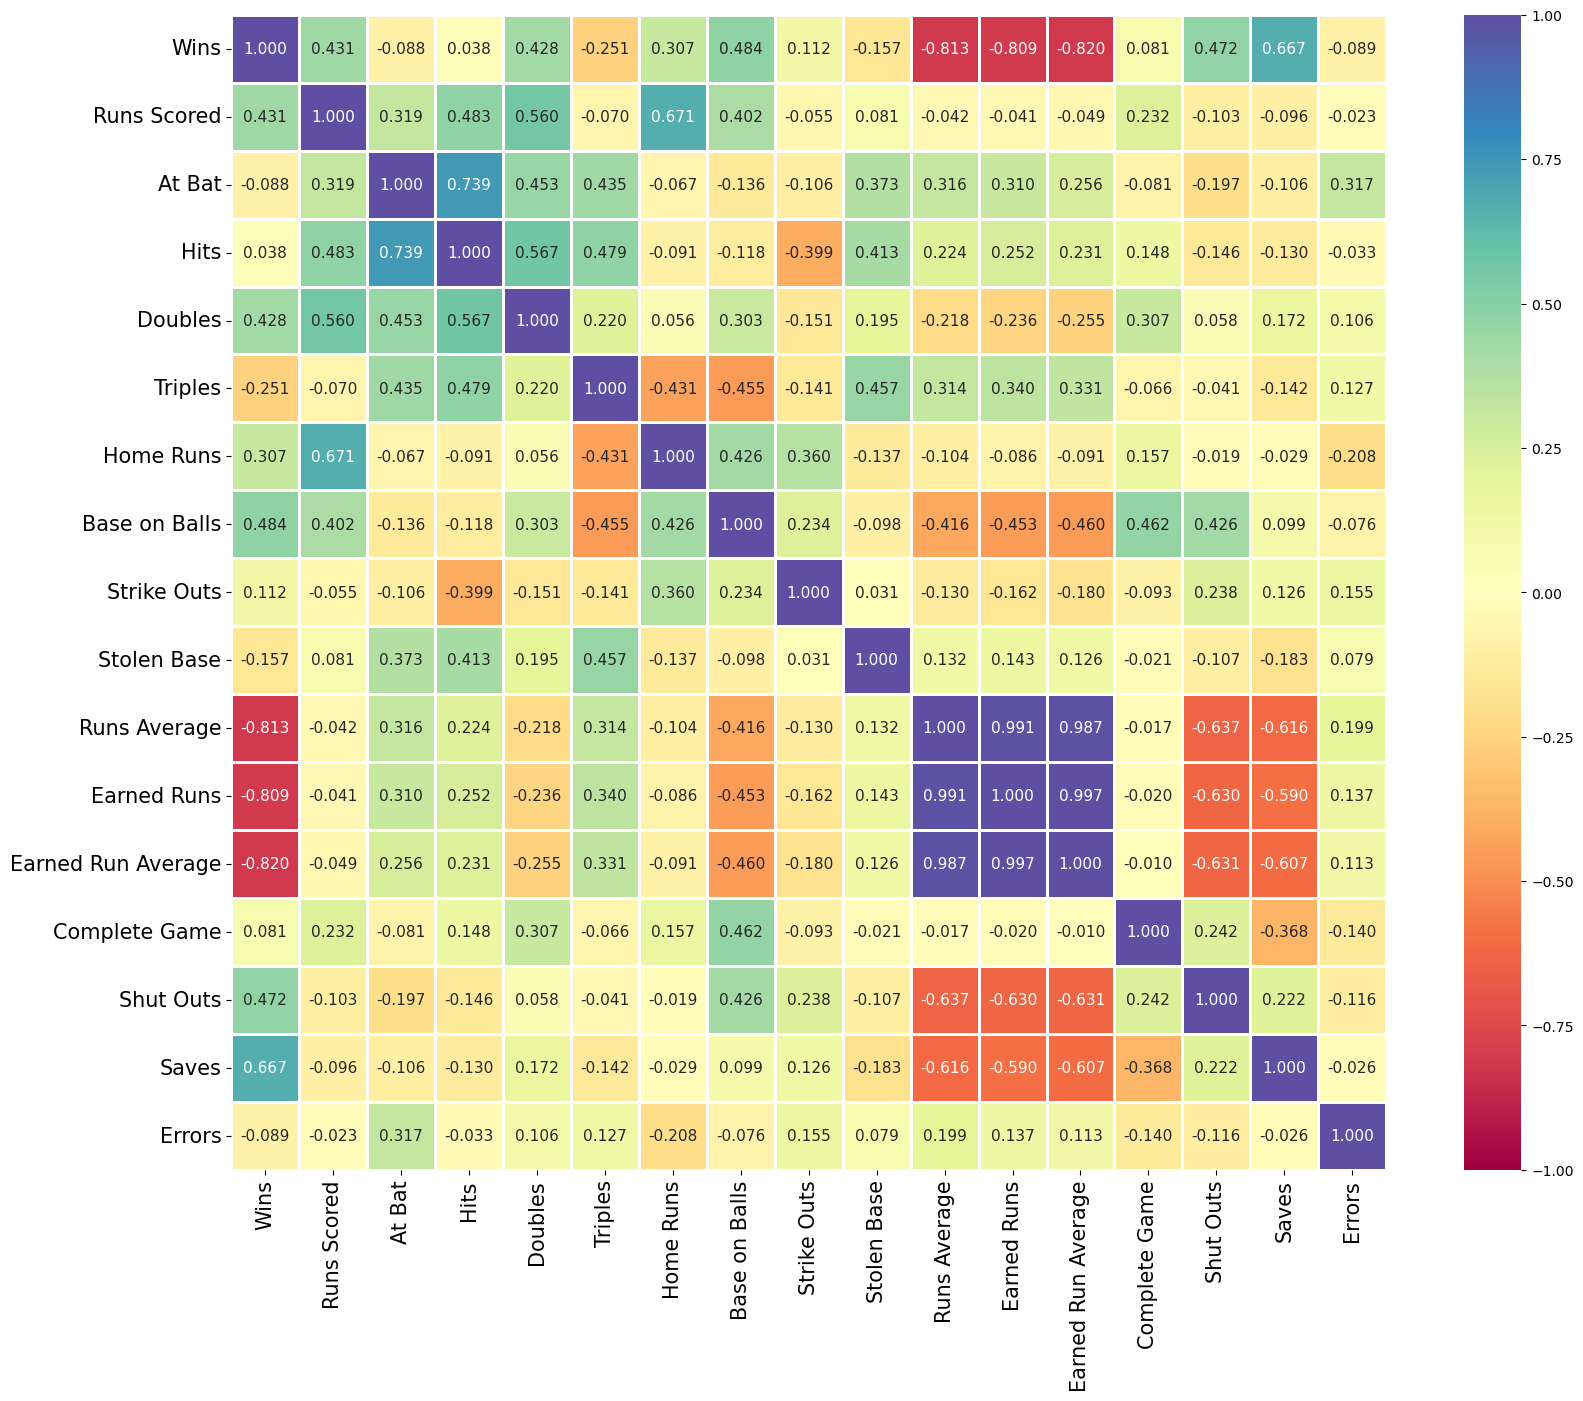

In [19]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':11}, cmap="Spectral",linewidth=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

thus we see that ,  Wins is highly correlated with "saves","earned Runs", "Earned run average", "Runs average"

## Visualisation

### Univariate Analysis

array([[<AxesSubplot:title={'center':'Wins'}>,
        <AxesSubplot:title={'center':'Runs Scored'}>,
        <AxesSubplot:title={'center':'At Bat'}>],
       [<AxesSubplot:title={'center':'Hits'}>,
        <AxesSubplot:title={'center':'Doubles'}>,
        <AxesSubplot:title={'center':'Triples'}>],
       [<AxesSubplot:title={'center':'Home Runs'}>,
        <AxesSubplot:title={'center':'Base on Balls'}>,
        <AxesSubplot:title={'center':'Strike Outs'}>],
       [<AxesSubplot:title={'center':'Stolen Base'}>,
        <AxesSubplot:title={'center':'Runs Average'}>,
        <AxesSubplot:title={'center':'Earned Runs'}>],
       [<AxesSubplot:title={'center':'Earned Run Average'}>,
        <AxesSubplot:title={'center':'Complete Game'}>,
        <AxesSubplot:title={'center':'Shut Outs'}>],
       [<AxesSubplot:title={'center':'Saves'}>,
        <AxesSubplot:title={'center':'Errors'}>, <AxesSubplot:>]],
      dtype=object)

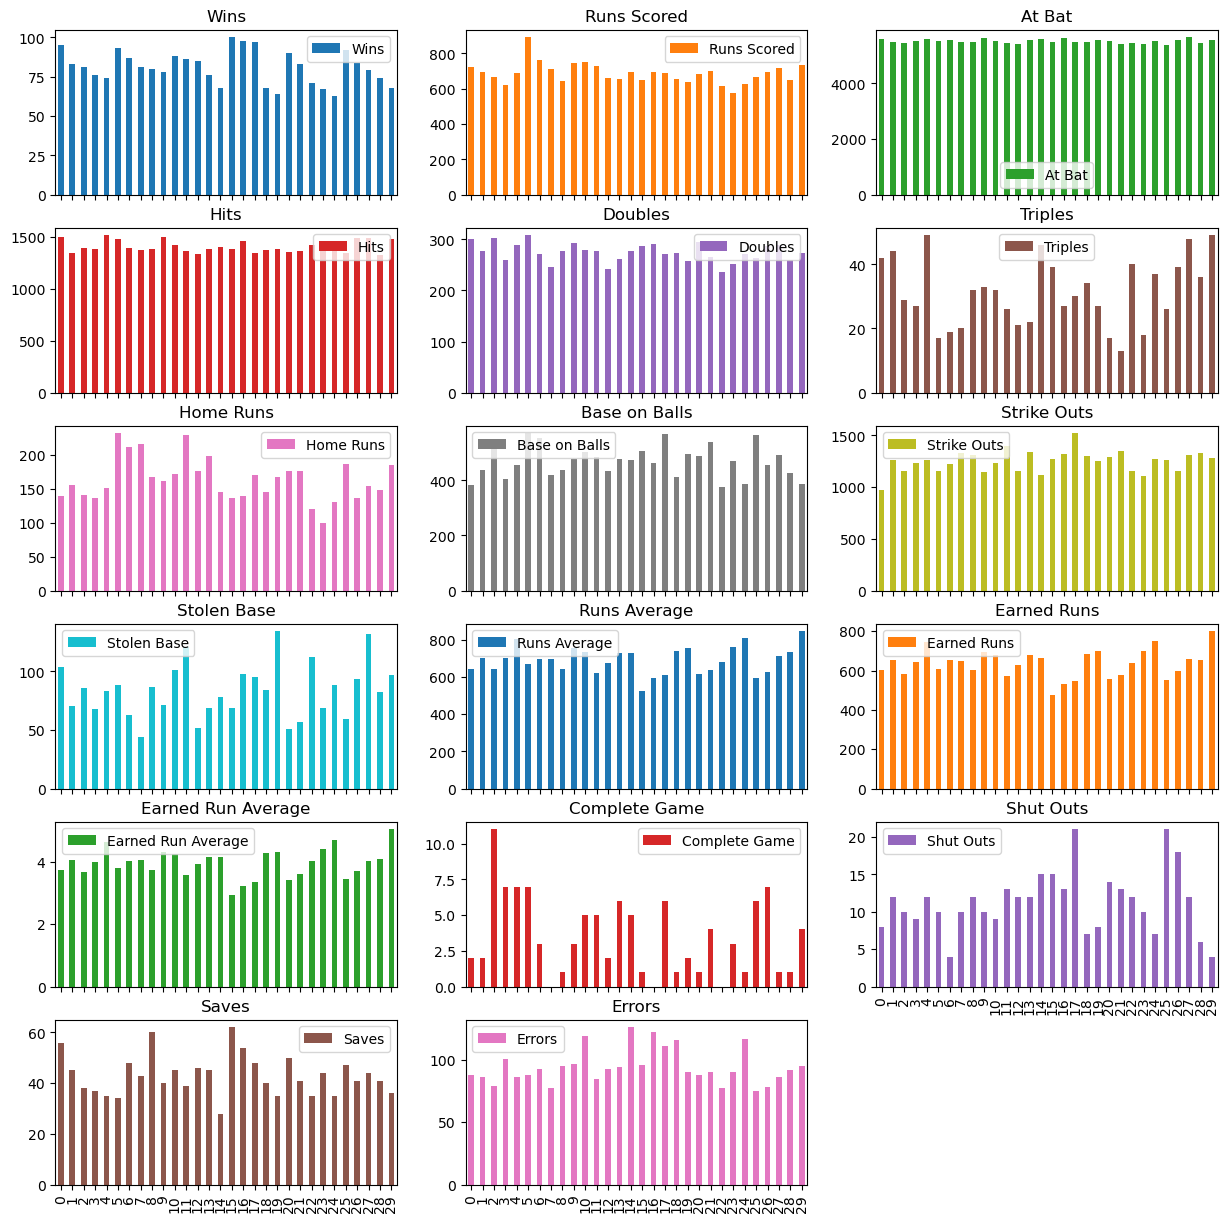

In [20]:
df.plot(kind='bar',subplots=True,layout=(6,3),figsize=(15,15))

From above graphs we can notice the range for each variable

### Checking for outliers using boxplot of univariate analysis

Wins                     AxesSubplot(0.125,0.653529;0.110714x0.226471)
Runs Scored           AxesSubplot(0.257857,0.653529;0.110714x0.226471)
At Bat                AxesSubplot(0.390714,0.653529;0.110714x0.226471)
Hits                  AxesSubplot(0.523571,0.653529;0.110714x0.226471)
Doubles               AxesSubplot(0.656429,0.653529;0.110714x0.226471)
Triples               AxesSubplot(0.789286,0.653529;0.110714x0.226471)
Home Runs                AxesSubplot(0.125,0.381765;0.110714x0.226471)
Base on Balls         AxesSubplot(0.257857,0.381765;0.110714x0.226471)
Strike Outs           AxesSubplot(0.390714,0.381765;0.110714x0.226471)
Stolen Base           AxesSubplot(0.523571,0.381765;0.110714x0.226471)
Runs Average          AxesSubplot(0.656429,0.381765;0.110714x0.226471)
Earned Runs           AxesSubplot(0.789286,0.381765;0.110714x0.226471)
Earned Run Average           AxesSubplot(0.125,0.11;0.110714x0.226471)
Complete Game             AxesSubplot(0.257857,0.11;0.110714x0.226471)
Shut O

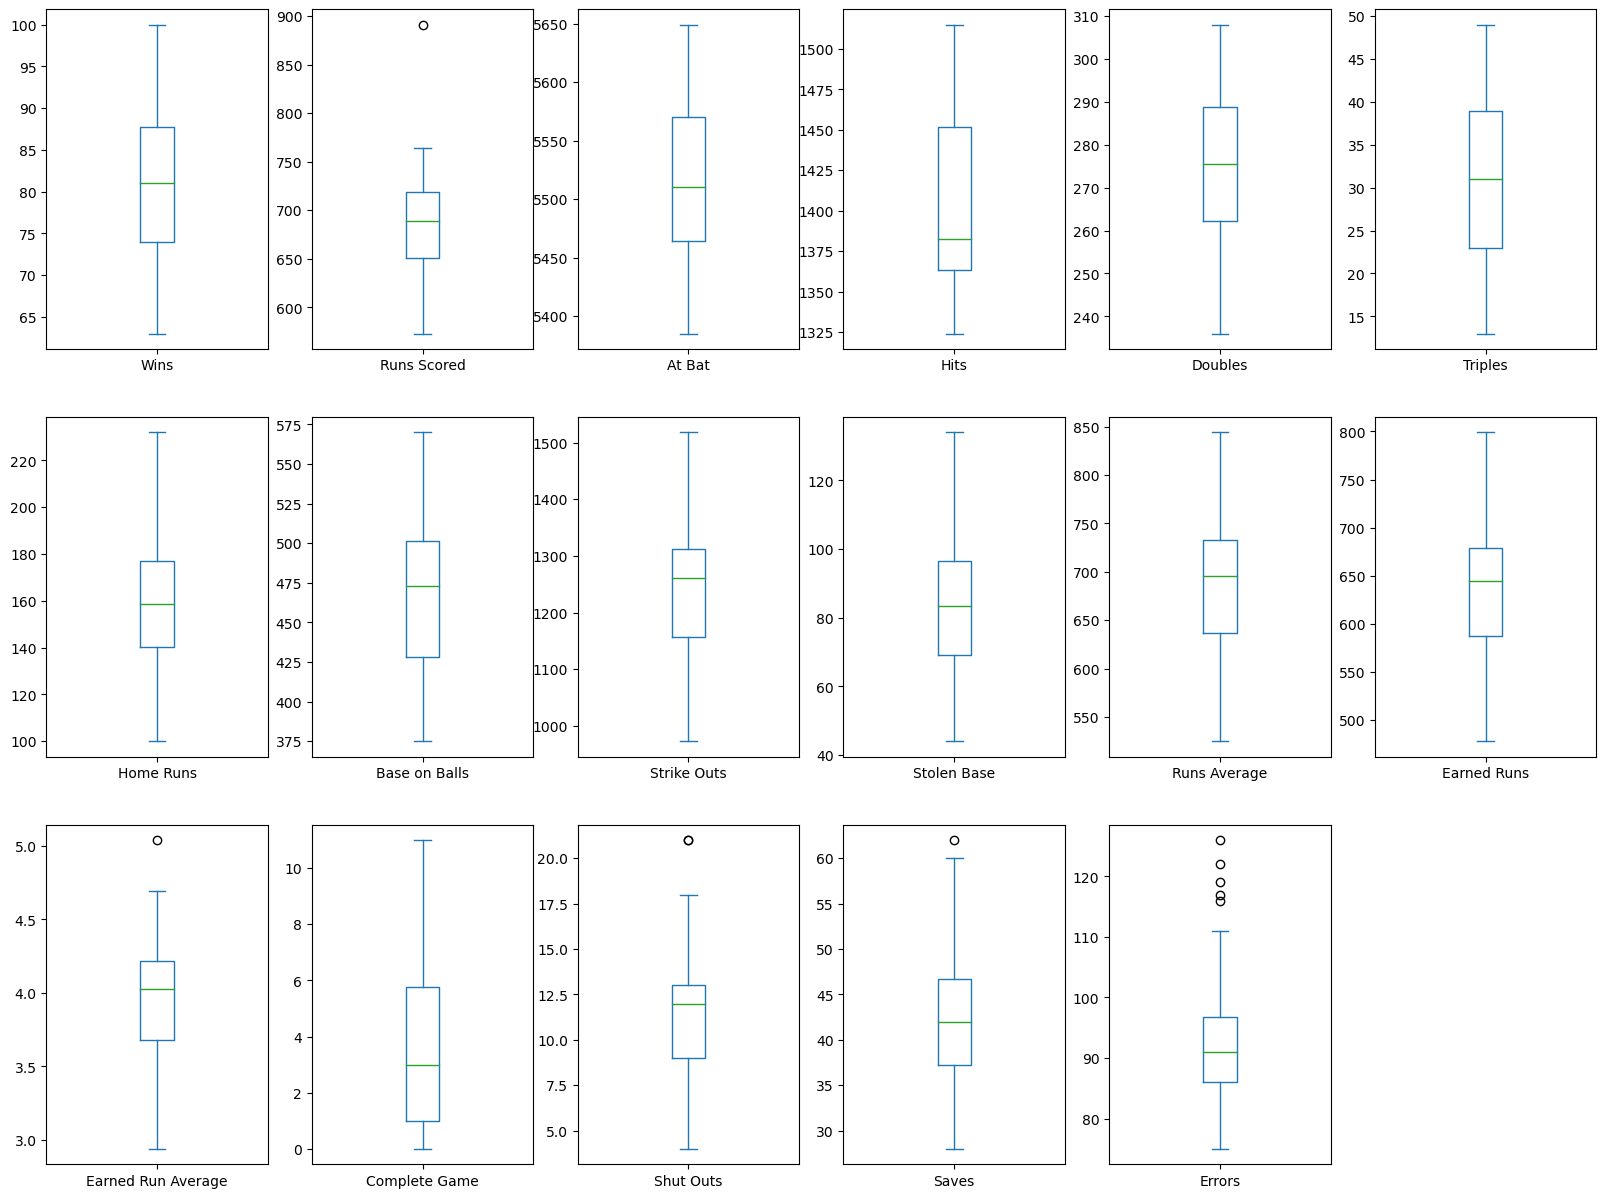

In [21]:
### Now we will check for outliers

df.plot(kind='box',subplots=True,figsize=(20,15),layout=(3,6))

The above boxplots represents that there are some outliers present in Runs scored, earned run average , shut outs , saves and errors, so we will remove them before training our model

## Removing outliers using Zscore 

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print ("Shape of the dataframe before removing outliers:",df.shape)
print ("Shape of the dataframe after removing outliers:",df1.shape)
print ("Data loss post outlier removal:",((df.shape[0]-df1.shape[0])/df.shape[0]*100),'%')

Shape of the dataframe before removing outliers: (30, 17)
Shape of the dataframe after removing outliers: (29, 17)
Data loss post outlier removal: 3.3333333333333335 %


As the data loss is less than 10%, it is acceptable.

### Checking for skewness using distplot

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

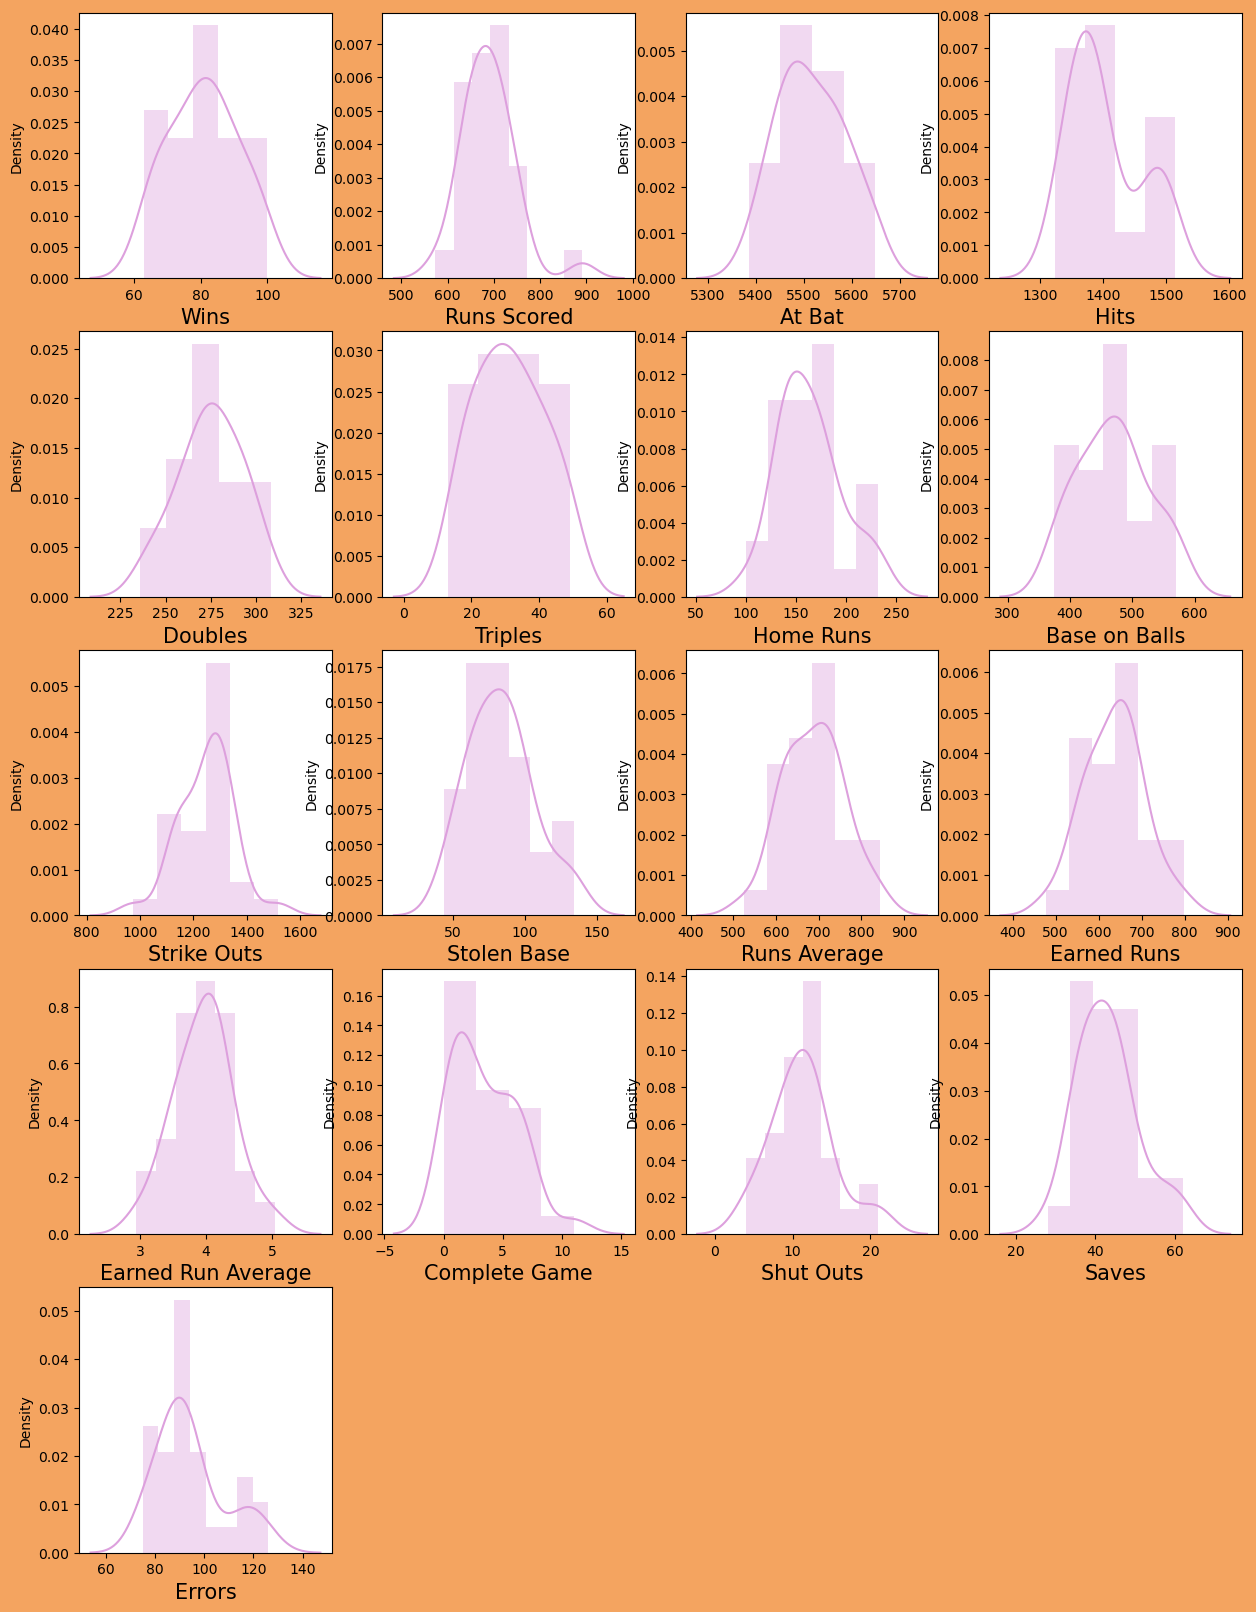

In [23]:
plt.figure(figsize=(15,20),facecolor='sandybrown')
pltno=1

for c in df:
    if pltno<=17:
        ax=plt.subplot(5,4,pltno)
        sns.distplot(df[c],color='Plum')
        plt.xlabel(c,fontsize=15)
        
    pltno+=1
df.skew()

From above distribution we can see that almost all the variables display a bell shaped curve and hence normaly distributed but in some columns there is skeness above the accepted range, so we will apply cuberoot formula to decrease it till it reaches inside the acceptance range

### Bivariate Analysis

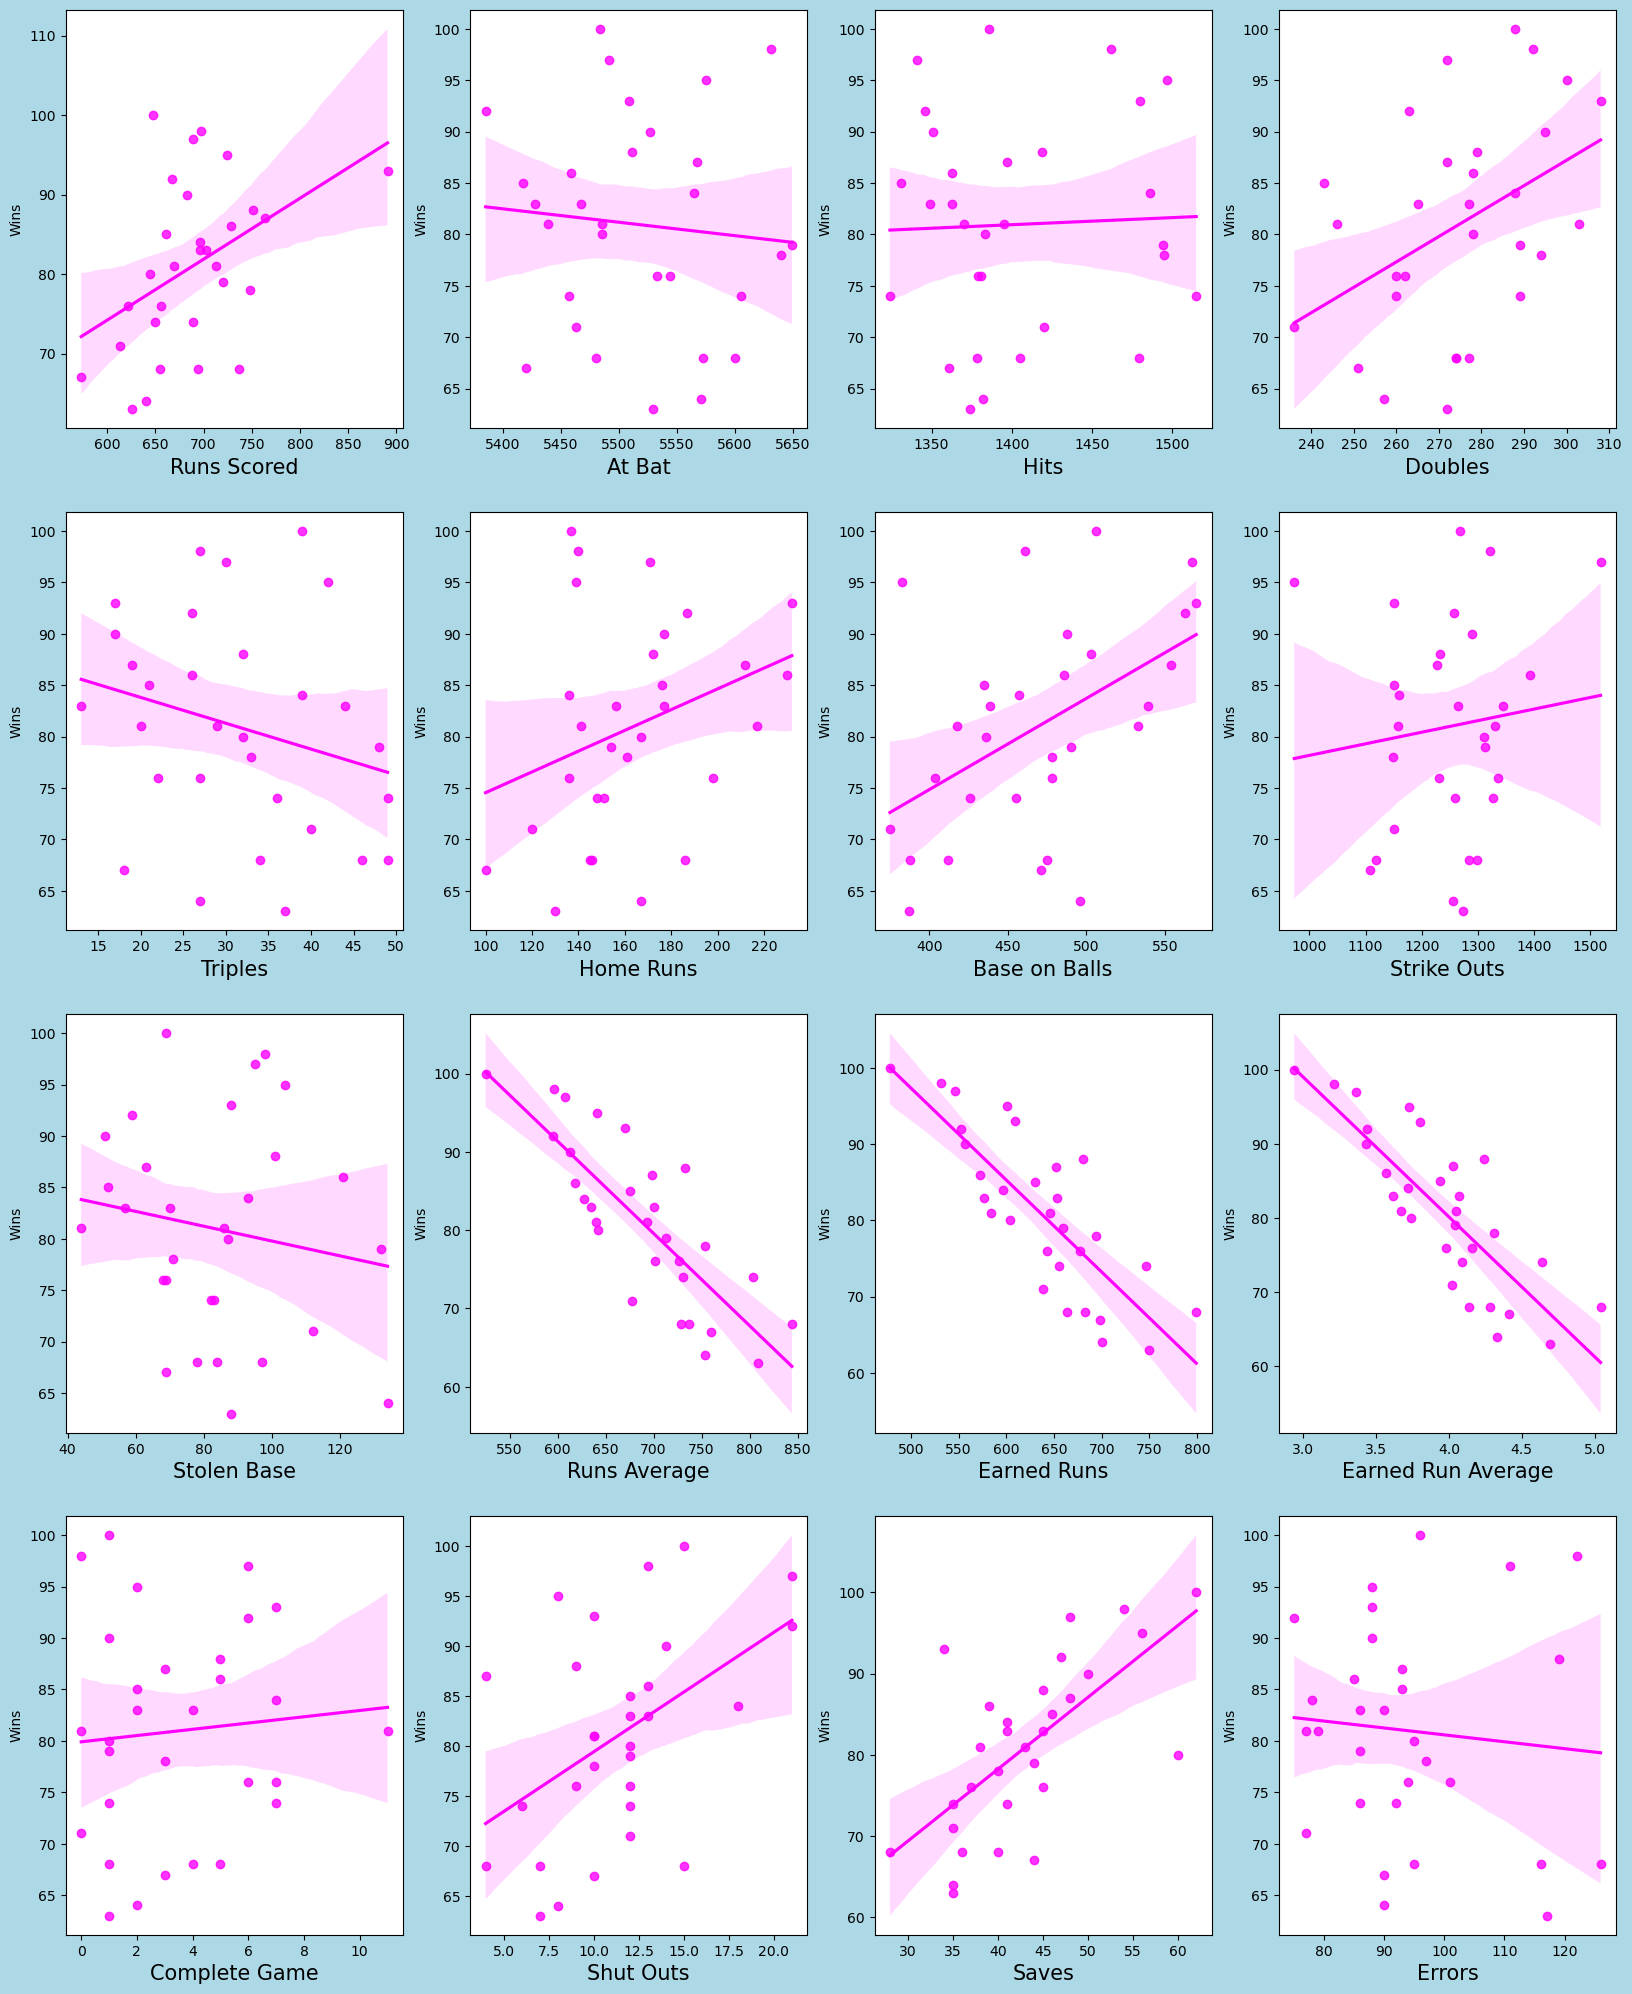

In [24]:
x=df.drop(['Wins'],axis=1)
plt.figure(figsize=(20,25),facecolor='lightblue')
pltno=1

for i in x.columns:
    if pltno<=16:
        ax=plt.subplot(4,4,pltno)
        sns.regplot(x=i,y=df['Wins'],data=df,color='magenta')
        plt.xlabel(i,fontsize=15)
        
    pltno+=1

From above graphs we can see the linear relationship of wins with every other independent variable

## Multivariate Analysis

### Pair Plot

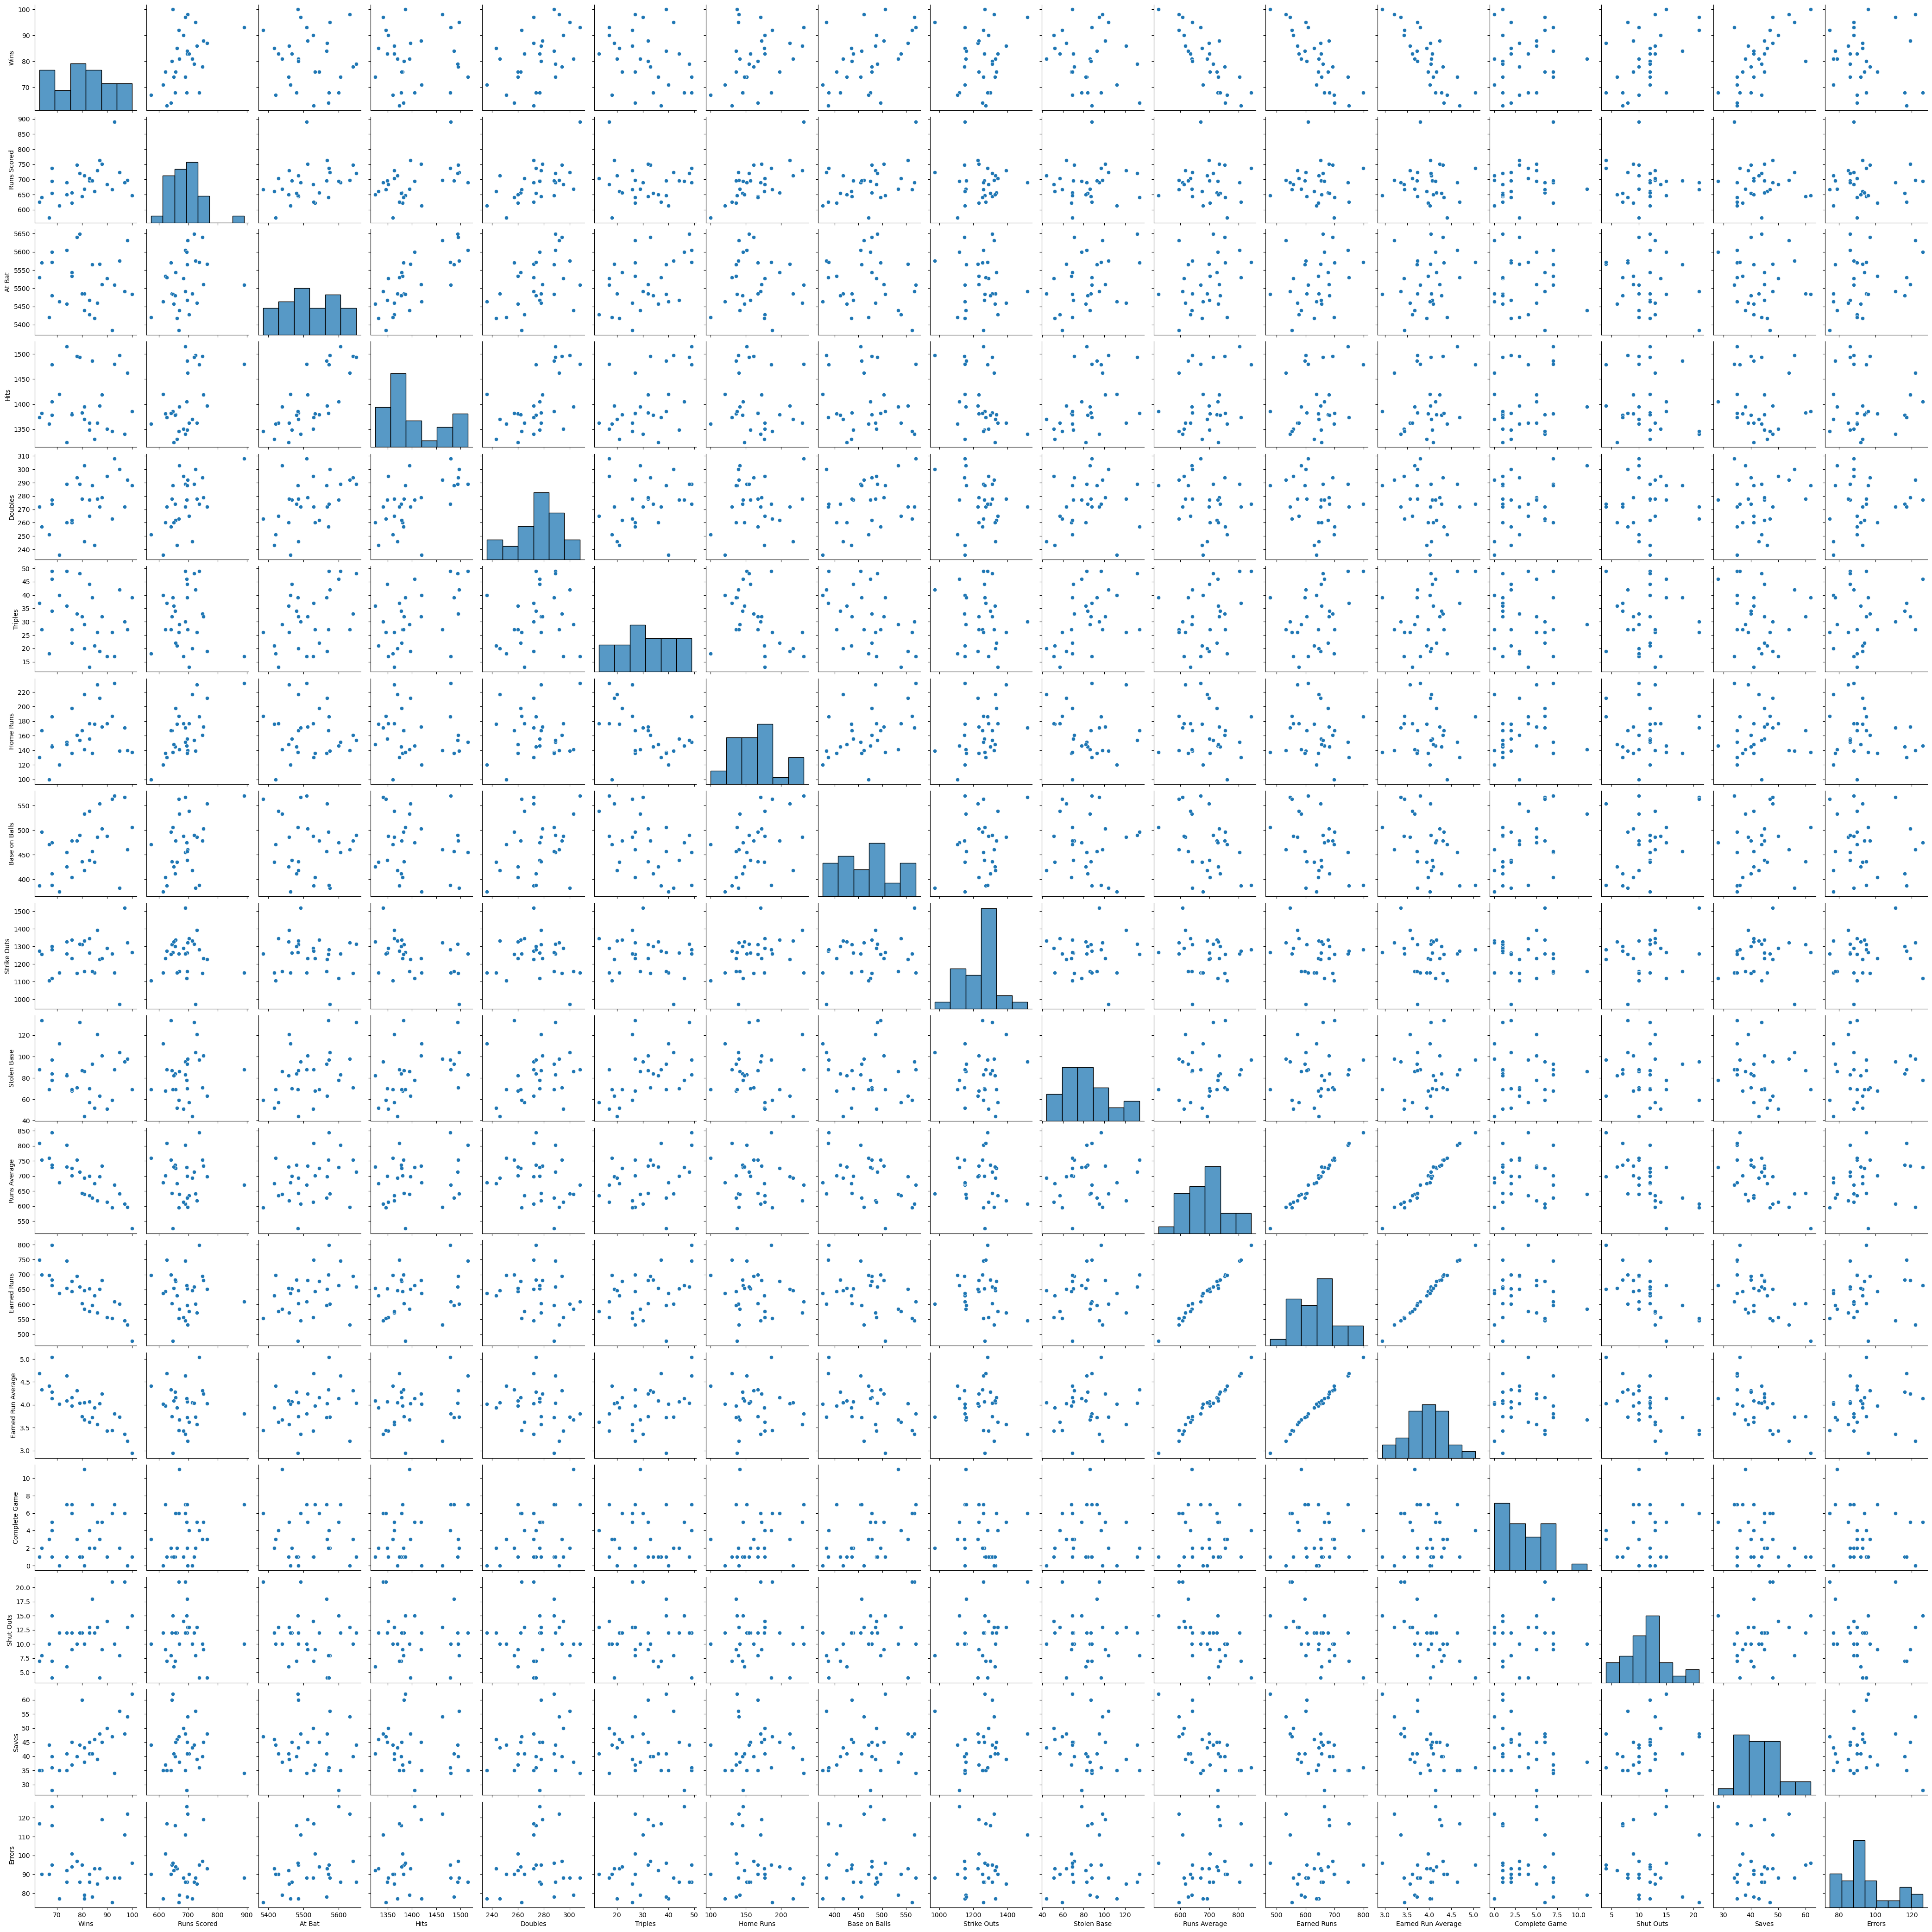

In [25]:
sns.pairplot(df)

# Checking for Skewness

In [26]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

As we can see that the skewness is near the acceptable range (-/+ 1) we will not remove any sknewness from the data.

## Standard Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=df1.drop(['Wins'],axis=1)
y=df1['Wins']
scaled_x=sc.fit_transform(x)

## Checking Multicollinearity using VIF

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

,Features,vif
0,Runs Scored,7.229564
1,At Bat,18.333377
2,Hits,10.558458
3,Doubles,3.743423
4,Triples,3.278636
5,Home Runs,8.426403
6,Base on Balls,3.431971
7,Strike Outs,2.720640
8,Stolen Base,2.110804
9,Runs Average,197.315706


There is a lot of multicollinearity in the dataset as the acceptance range for VIF factor is 10. We will use PCA to reduce this.

## PCA to remove multicollinearity

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
X = pd.DataFrame(pca.fit_transform(scaled_x), columns=x.columns)
X.head(10)

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,1.040418,-2.998482,2.390631,-0.782861,-2.440002,-0.007693,0.640910,0.339132,0.837185,-0.021962,-0.596074,-0.288474,-0.148793,0.184951,-0.073924,0.009493
1,0.082502,0.473554,0.333381,-0.182392,-0.320951,0.467551,-1.039055,1.231838,0.189278,-0.677803,0.614050,-0.211540,0.019737,0.491118,0.052067,-0.032228
2,-1.234703,-0.852540,-0.038259,3.252264,-0.757129,-0.714970,1.549105,1.351710,0.130466,0.547696,0.505778,0.097515,0.097915,-0.108510,-0.007910,0.000761
3,0.680562,1.423353,0.804293,0.994373,0.358662,-0.945762,-0.009278,-0.101724,0.144915,1.581640,-0.479499,0.121201,0.720541,0.244642,0.004039,-0.012332
4,3.375800,-1.483663,-0.739327,1.793146,-0.109332,0.217560,-1.128995,0.293687,-1.216725,0.140332,-0.087418,0.171118,0.026218,-0.284547,-0.094729,-0.013489
5,-0.329446,-0.226394,-2.762484,-1.300450,-1.693950,-1.053420,1.057617,-0.426011,-0.077575,-0.567319,0.166482,0.141720,0.833282,-0.003566,0.107151,-0.006712
6,-0.708705,2.230857,-1.603350,-1.601015,-1.676362,0.858409,-1.233220,-0.557468,0.106016,0.558265,0.123334,0.225442,-0.001087,-0.001686,-0.014340,0.023542
7,-1.402802,-0.019392,1.155383,-1.545183,0.051551,0.432543,-0.010320,0.861289,-0.729311,-0.073429,-0.847197,-0.435728,-0.167266,-0.155419,0.052123,0.008779
8,2.148232,-1.993567,-0.923356,-0.089902,-1.171097,-1.143858,-0.387613,-0.841622,-0.334200,-0.149301,0.461296,0.062081,-0.329627,0.017876,-0.043741,0.007278
9,1.036721,-0.929021,-1.425914,-0.335159,0.622014,-1.038534,0.793520,0.338591,0.841189,-0.953543,-0.819650,0.410281,-0.349550,0.141352,-0.007414,-0.016445


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif

,Features,vif
0,Runs Scored,1.0
1,At Bat,1.0
2,Hits,1.0
3,Doubles,1.0
4,Triples,1.0
5,Home Runs,1.0
6,Base on Balls,1.0
7,Strike Outs,1.0
8,Stolen Base,1.0
9,Runs Average,1.0


As we can see we have reduced the multicollinearity using PCA and now they are all in the acceptange range

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

## Building model

In [32]:
model=[LinearRegression(),Ridge(),Lasso(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),ExtraTreesRegressor(), GradientBoostingRegressor(),XGBRegressor()]

In [33]:
maxAcc = 0
for m in model:
    for i in range(1,1000):
        xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = .25, random_state=i)
        m.fit(xtrain,ytrain)
        m.score(xtrain,ytrain)
        pred = m.predict(xtest)
        acc = r2_score(ytest,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9661861455868985 on Random State: 643


So the best random state is 643

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = .25, random_state=643)

## Every regression model with their metrics

In [35]:
for m in model:
    m.fit(x_train,y_train)
    mpred=m.predict(x_test)
    print('\033[1m','For',m,'\033[0m')
    print("R2 score :",r2_score(y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(y_test,mpred))
    print("Mean squared error: ", mean_squared_error(y_test,mpred))
    cvs=cross_val_score(m,X,y)
    print('Cross Validation Score=',cvs.mean(),'\n')

 For LinearRegression() 
R2 score : -1.0785475877537816
Mean absolute error:  11.756930363851232
Mean squared error:  253.29050995143345
Cross Validation Score= 0.037628660496314414 

 For Ridge() 
R2 score : 0.9661861455868985
Mean absolute error:  1.4752829535414396
Mean squared error:  4.120535165121531
Cross Validation Score= 0.3374778769069561 

 For Lasso() 
R2 score : 0.9010678885072255
Mean absolute error:  2.6483795107369623
Mean squared error:  12.055805273939818
Cross Validation Score= 0.2273265658919475 

 For DecisionTreeRegressor() 
R2 score : 0.24810873188870364
Mean absolute error:  8.625
Mean squared error:  91.625
Cross Validation Score= -1.0577223173689 

 For RandomForestRegressor() 
R2 score : 0.37274830106423906
Mean absolute error:  7.5749999999999975
Mean squared error:  76.4365
Cross Validation Score= -0.3775913139499524 

 For KNeighborsRegressor() 
R2 score : 0.7008026670085907
Mean absolute error:  4.850000000000001
Mean squared error:  36.46000000000002
Cro

##### So our best model is Ridge Regression model, now we will use hyperparameter tuning on it

## Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Checking for alpha from .0001 to 1 and finding the best value for alpha
fmod_param = {'alpha': (np.logspace(-4,0,30))}

In [38]:
GSCV = GridSearchCV(Ridge(),fmod_param)
GSCV.fit(x_train,y_train)
GSCV.best_params_

{'alpha': 1.0}

In [39]:
final_model = Ridge(alpha=1)
fitting = final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred)
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 0.9661861455868985


## Visualising Ridge regression and best fit line graphically


Text(0.5, 1.0, 'Best Fit Line')

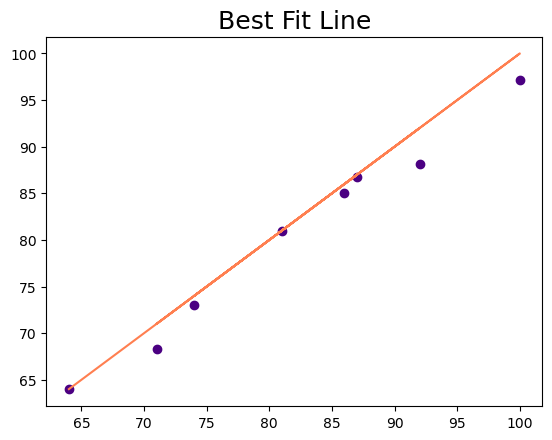

In [40]:
plt.scatter(x=y_test,y=fmod_pred,color='indigo')
plt.plot(y_test,y_test,color='coral')
plt.title('Best Fit Line',fontsize=18)

## Saving the model

In [41]:
import joblib
joblib.dump(final_model,'Baseball_Case_study.obj')

['Baseball_Case_study.obj']

## Conclusion

In [46]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))
df_com

,original,predicted
0,64,63.961531
1,87,86.726778
2,74,73.035338
3,92,88.095325
4,81,80.931740
5,71,68.257006
6,100,97.114082
7,86,85.075936


### Concluding Remarks And why the model have choosen

comparing predicted with actual model dataset, results almosts gives good accuracy. and considering with other model, Ridge regressor only gave high accuracy with 96.61%

## Thank you